# UNB - PPGI
# Processamento de Imagem
## Trabalho 03

Henrique Brandão

___

Escolha duas imagens monocromáticas , entre 500 e 700 pixels de largura ou altura. As dimensões da imagem tem que ser bem documentadas.

Processe cada imagem X aplicando uma distorção de perspectiva de forma que a base da imagem fique 20% menor que o topo, seguido de uma rotação de 45% do resultado, formando uma nova imagem Y. Documente o resultado Y, aponte dimensões e faça uma análise
 
Inverta os passos do processo para recuperar a imagem X
  
Compare X com X’. Exiba a imagem de erro E=X-X’+1
8. 
Entrega é um documento em PDF em formato de relatório. Código só em sessão de anexo/apêndice. Não precisa enrolar nem colocar background, mas precisa discutir o que você está fazendo e discutir os resultaos. 

In [1]:
import cv2

import numpy as np
import seaborn as sns

from math import sqrt
from random import choice

from PIL import Image
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
f1, f2 = 'img01.jpg', 'img02.jpg'

x1, x2 = cv2.imread(f1), cv2.imread(f2)

> https://chat.openai.com/c/9f13b7b5-c676-4447-8287-2c1efeb6dc87

In [3]:
def distorce(imagem):
    # Definir a largura e a altura da imagem
    largura, altura = imagem.shape[1], imagem.shape[0]

    # Definir os pontos da perspectiva
    top_left = [0, 0]
    top_right = [largura, 0]
    bottom_right = [largura, altura]
    bottom_left = [0, altura]

    # Definir a nova largura da base (20% menor)
    nova_largura_base = largura * 0.8

    # Aplicar a distorção de perspectiva
    pts1 = np.float32([top_left, top_right, bottom_right, bottom_left])
    pts2 = np.float32([top_left, [nova_largura_base, 0], bottom_right, [0, altura]])

    matriz_perspectiva = cv2.getPerspectiveTransform(pts1, pts2)
    imagem_distorcida = cv2.warpPerspective(imagem, matriz_perspectiva, (largura, altura))

    # Realizar a rotação de 45 graus
    angulo_rotacao = 45
    matriz_rotacao = cv2.getRotationMatrix2D((largura / 2, altura / 2), angulo_rotacao, 1)
    imagem_rotacionada = cv2.warpAffine(imagem_distorcida, matriz_rotacao, (largura, altura))
    return imagem_rotacionada

In [4]:
y1, y2 = distorce(x1), distorce(x2)

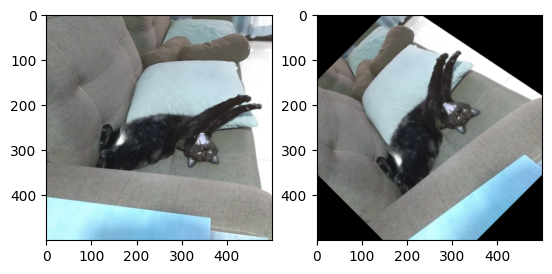

In [5]:
plt.subplot(1,2,1)
plt.imshow(x1)

plt.subplot(1,2,2)
plt.imshow(y1)

plt.show()

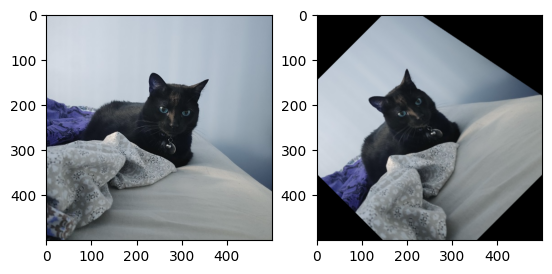

In [6]:
plt.subplot(1,2,1)
plt.imshow(x2)

plt.subplot(1,2,2)
plt.imshow(y2)

plt.show()

In [7]:
def restaura(imagem_rotacionada):
    # Definir a largura e altura da imagem
    largura, altura = imagem_rotacionada.shape[1], imagem_rotacionada.shape[0]

    # Definir os pontos da perspectiva inversa
    top_left = [0, 0]
    top_right = [largura, 0]
    bottom_right = [largura, altura]
    bottom_left = [0, altura]
    
    # Definir a nova largura da base (25% maior)
    nova_largura_base = largura * 1.25
    
    # Calcular os pontos da perspectiva inversa
    pts1 = np.float32([top_left, top_right, bottom_right, bottom_left])
    pts2 = np.float32([top_left, [nova_largura_base, 0], bottom_right, [0, altura]])
    
    matriz_perspectiva_inversa = cv2.getPerspectiveTransform(pts2, pts1)
    
    # Aplicar a perspectiva inversa
    imagem_restaurada = cv2.warpPerspective(imagem_rotacionada, matriz_perspectiva_inversa, (largura, altura))
    
    # Realizar a rotação inversa de -45 graus
    angulo_rotacao = -45
    matriz_rotacao_inversa = cv2.getRotationMatrix2D((largura / 2, altura / 2), -angulo_rotacao, 1)
    imagem_original = cv2.warpAffine(imagem_restaurada, matriz_rotacao_inversa, (largura, altura))

    return imagem_restaurada

In [8]:
x1r, x2r = restaura(y1), restaura(y2)

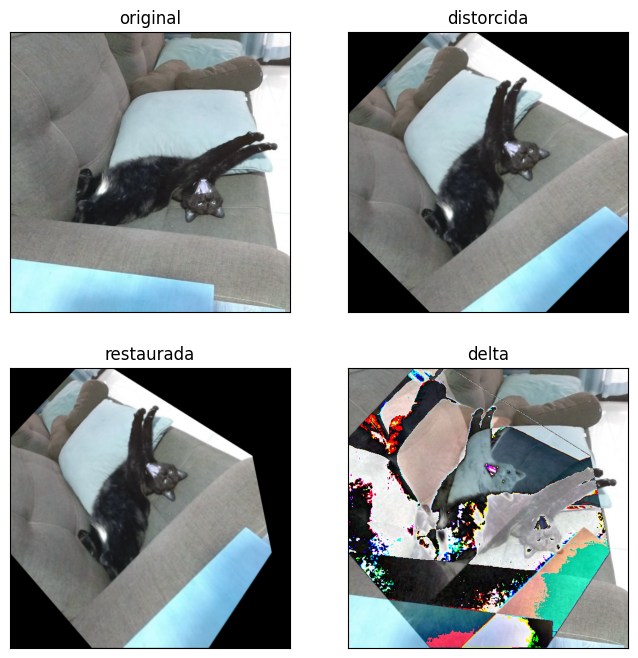

In [9]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.title('original')
plt.imshow(x1)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.title('distorcida')
plt.imshow(y1)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.title('restaurada')
plt.imshow(x1r)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,4)
plt.title('delta')
plt.imshow(x1 - x1r)
plt.xticks([])
plt.yticks([])


plt.show()

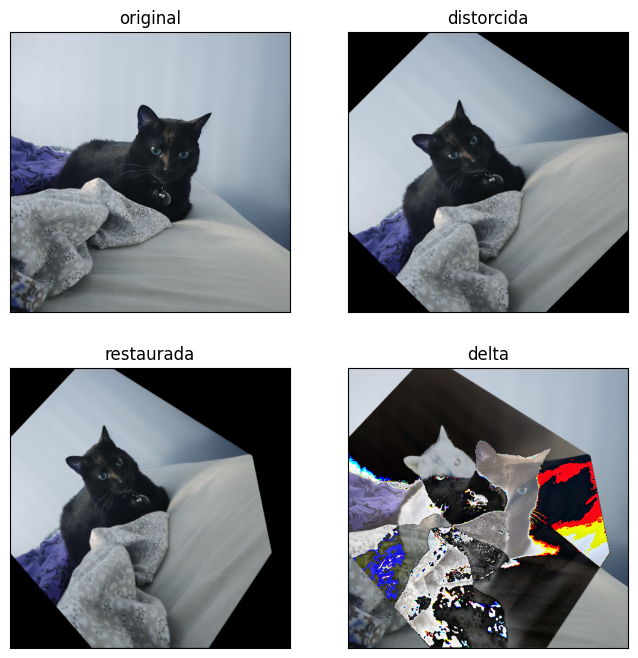

In [11]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.title('original')
plt.imshow(x2)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.title('distorcida')
plt.imshow(y2)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.title('restaurada')
plt.imshow(x2r)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,4)
plt.title('delta')
plt.imshow(x2 - x2r)
plt.xticks([])
plt.yticks([])


plt.show()